### 1.0 Importing Dependecies:

In [14]:
# Importing dependencies:
import pandas as pd
import numpy as np
from scipy import stats
import string

from matplotlib import pyplot as plt
import seaborn as sns

# Tokenizers
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim.models as gs
from gensim.models.phrases import Phrases, Phraser

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom preferences for displaying and visualizing data
sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)

%matplotlib inline

### 2.0 Importing Data:

In [2]:
df = pd.read_json('data/strings/recipes_raw_nosource_fn.json')
df_1 = pd.read_json('data/strings/recipes_raw_nosource_epi.json')
df_2 = pd.read_json('data/strings/recipes_raw_nosource_ar.json')
df.head()

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,QaFfhzgVliz840HdAnIypaGteQn5q3K,2ZlbPBIZEDWBdGFcJ/KhApHyOTYvt.G,8zGobobyDsaZYEw2dC0aOx5OMhA.TK6,GFhRq1LHg7bITZxzrQAdN1vt4U/9AXq,1NTEgJqoZSeiOR3lIYJpY6MdJy8J9oe,bB.av.HvROUULt52UwCNhYjmFwFMcEe,R1AQFiWULG/FuRSEB/.qFwcAbj.Phu.,RrewJ0.1fBlHmLH3BaXji7y2D08.KKK,z8enrwKc4Z3gxVmuxOKMZI/6GKSt1N2,pKpcLCAbXuvJJA3IZVlEhNjhOsBw15K,1Yls1UOBlB8tCWEQBJud.hEpzr15KIC,MoNU9eS8AI7BA07L/NbQkMgMdAhU43W,0HTC6/JWf4bJnNhpnYq8wqdew1bjJfO,HhWW9P3PtcVFgJa0A/ILP1QkY9u.XV2,6EcFqHg6GCifvTAJ/wqdNPIQJKhpyLi,WGZp7rKLW7ZheJIAtz/P8ZRzz7mqmlS,q68RErl7vzM2apk72GE/pEn0CVOEZry,esOZ0jNZz7beIh14E0KO/W8x/K/jRve,HwwWzw4M8OFnirNJvatbCn1k8TAtHc.,5t9WTRW1LmAZijA8EHHZ9v5LAhGfDOu,3sIf1qZuDOUV.tbEkqvAZGRfGLlTCgC,V5GdC6vvg9J71EWy50B55LojJoBZMjG,k3nUcqWBqw04GVwcooooX4QgMIhNObC,Sr5NOGRwFL2Et29RpmmnmgggA.9QAHK,QSFgCm1C3roLQYIYcnNmQHcKv11woyG,USvt1m2a7RwPmcqzD0/Au3VIrhP1RfS,h.BGRIoIdDmHwh72bF0aoCOluCXKkqW,wosCcAjyrLqlGtKyeu3SrclW91lI8n.,WPeQwcG9YD7MZrMQ4FdAlRS5LkZAdrC,zPd4EpB9aJLKw7nDkKoLv68L2kyNVU2,ygpfQqCl4qS.B5rEE3XBmCfJcqY3KMu,51qro2lQOQbj.oGlsu9NbnQF83QjUuK,JyR61cAN81XDUH0elFITpIuPO0Wwnqa,wg7Frz5wokYazNqF7awKz/s/iXZX/5e,/qlwIX5k7wiNvn/1FTAH0QbLp2BVsWi,BOj.9Z7aA2FJTIKXqDuyPCVoWr9goAq,Ayq3syHvYUYoss1fz2Wv.UvyHUIN3wq,73ftuME6qPNdYWIlaky2J0XOJOvAMJu,ZP4/HHU4BtVBSfMUrUekTgSuFWdQEHC,xcjKuDBYLjAZU2Lc.xx7JHP5uwlh9.6,/HUAnS1MX7NzQAzmotNaPMbfhY1fYJO,fmC2JZRdPGhUZIPolMvAXU1/04LhdTG,xUUxs21Yy/iJWUmxmh.FKdNbVG2x8vW,OqmpC0c1Vy/1R5aGuF088FGIdRh8j9C,1tAP4ORwXi3Yeu9tfXirB2DNx21Fz/2,eEXCa.uU9DMKTeahKcU1tbb3Ia9rQPu,FCC2urvO9mHp9bCAp7KPV83zx7c1UNy,VBDEjC.UD6rn4JIsTqPDDJuiBgKRfSK,bwc/vXzRZUuW6JcRzS6W4lRkcL9UucS,ZBh9cfJ9.gZ2VOQKATD97UQdTMuGCDe,ax1bstcxp2Jmead4/9kIU8y6PV9fWC6,fVwHfTpUGiVReEQnTmLx8FBKKKuiksa,aroKnRI/YmBU8PerQgA1Jy9.oG2CHUK,4fg4NJItPy1zldCCF/K1mKGWKmaiCWC,mTVAlxIQnIUW5up85bAxFtVGaRihvuG,3Ls4pGzlapIaiUm2uzXepC64aOQL.Va,19iEErd.Fr67OyPu567TOd.JSpGBwPW,RQkTYhUFn7gw.c/HYp.WNdwFoiM9x5O,NLMk5I0BmNo5JEIL1NVBa6WigZa4iyu,RDaMh0kExw9oKKur.AtcLDhOJ58dVl.,XiYLgl6PQ2vNg59HnRAswxt3Bq5rIoC,TZtt.EUUcWEbazOH.6IySAZkpNEghzm,Z4uw9xHk39TWHE3cXxBgngdP4RqOVE6,tdvuEB/I9vJ.Dl1adSwt8gBDrHu5Cj.,qFVyk1jfdVfvSmop3H0vaodYaXIoHrO,ftmm5mYRAdbFeALejOaBjTyOL21MIjy,17Na9VBWFUxCXZiu.dPzItUBwV5Tkl2,SkToMETyobW.5FogkWHv1FGSytaYHoC,FTHh4mhJ1lI0lDd7VvrPiY08orSFt.q,A2gMlrAFP90OEMlC5YUyEN6HtENArxa,Y27UiMiNPgtf02VHCrI1wZ/Jx4Qjpnm,AihwG.LMlNqIrRUnCt4foYhMIbsdijq,.gkPCiAAtkpkS1eJtU/0GVHztYteklC,Lbn2YKfJ0cLkH.p64RO6B0GXbg.kahG,Y9scOUYH1Fdw8kC2/inyTPTBAW.bRue,Kr1bfkd10/oZrRHjPjf90X5ILWTTh8q,Dp2yUVIwInIaYptX6y26sBVO3em5cHC,zeWnoMErrPxvKBMb.RTBuMg7dLDwUrK,X0cf84hJBj9hi0vfyE92V3KMRCJv4IO,D7rLKyjMqUS65AEmopOQBFFQy0aLGjq,fJ2qXt3u4j/qqUbW1yzRIonspUl4i.e,arTM0lewN6mJ67PHjV8eMxbSxcUddFq,CfoDP1bfLKJ17bUS54sbUd9FaiytSsG,2LN7W2uMONUnyIsrbFB8oMe3rPkJMZu,ja5geQpSygF3XDJt1.f.6FdAO5pMgXC,StsWlh4NT9c5yKPDYLaw6ZQswzgQmXW,xdENEhwipFN7TMBEViAJ6m1dbbeobgm,a5OVE/z1pw6R14RlYps4osEIWI9DwUi,XFTt0ctKsf/FBfRyqFquv/P3inz/Dxm,me90QPHLRM1h9WIMKqA8sx8fU.zu9yG,...,/xCEJ8ocHiIGDt/EcSjK8HAM4PnNspC,HSX/Bm0WPg8GK.XYX7czMXZq6Ahgv2e,.YOFEZd2P99kcFhYaKD.cseOP.RmZLS,67bjAGdz8SBW5xEIQKMUx5B0uAWz/nq,UnRhHmSUopCNhV8h/ddBH164q5WCxm6,w3leeLqcwHG1KtABGB2jTYIZY/aYRrm,Dpjp/HdkUWgdZoeLAdaAWVCKA6orul2,kTfEstYWy5kmLzb4iu6ODxXm/5t6uEK,7ItN7OX4QL8LiKHvVh3Z0P.nVkLNVGK,dc2ea8kvbWjKCvX5KHVZZuX1t1EXriG,OrwH7YmteKnvKRGeDYdvVJP3qOD/mPG,7cANYLJPIG1.0tqB18WTtUl8MF/n2fG,PZVI8UEiOJFuR38iGhMOFUVJ4D/zvb2,i9npwJJQLKwMBZ3Ido7pJR9wiUb/tK.,P1lv5kGc94mJDoKY/EYZ26GrYMPXi3i,I3M.ztTXQevPKVACxER2QvMN2SyRR3S,mqJhraO0V8V/HWCuBpBmOP5/rdLdVx2,kSWq.MPB.X4cr5YKuBo71ErcN2..31i,suqjRg9qCtasawkDEGk9FyXlZO/mViW,O2ZIoPG0qw.B3/ceRKB04DS8mMmSHYK,p2PNBHEy9ZEZ8KZGhgw3cK.ZpsZpa.e,PODmrqhAKu/ZuyUKeIkftVDYyVmE4GG,kq9cFT9aWTgOTtUS/cJck8dr1XRNP/q,LDOELWUFxnAFxyqQECQW5nY39Usp6R6,dvXvlZBf2tFewYrFvaBCQhBZhCw

### 3.0 Data Pre-Processing:

#### 3.1 Transposing Data:

In [3]:
df_clean = df.transpose().drop('picture_link', axis=1)
df_clean = df_clean[['title', 'ingredients', 'instructions']]
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,"[1/2 cup celery, finely chopped, 1 small green pepper finely chopped, 1/2 cup finely sliced green onions, 1/4 cup ch...","Toss ingredients lightly and spoon into a buttered baking dish. Top with additional crushed cracker crumbs, and brus..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,"[2 pounds skirt steak, cut into 1/2-inch dice, Kosher salt and fresh cracked black pepper, 4 to 6 slices thick-cut a...",Watch how to make this recipe.\nSprinkle the steak with salt and pepper. Set aside.\nIn a large Dutch oven (preferab...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,"[1 1/2 cups dried black beans, picked over and rinsed, 8 cups water, plus 1/4 cup, 2 cloves garlic, 3 tablespoons ve...","In a large saucepan, let the beans soak in enough cold water to cover for 1 hour and drain. Return the beans to the ..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,"[1 1/4 pounds ground chuck, One 15-ounce can tomato sauce, 1/2 teaspoon salt, Freshly ground black pepper, 8 ounces ...",Watch how to make this recipe.\nPreheat the oven to 350 degrees F.\nBrown the ground chuck in a large skillet. Drain...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-cup quinoa, 2/3-cup sweet red peppers, raw, 4 oz. white tuna, canned i...",Special equipment: sushi mat\nCook the brown rice and quinoa in 3 cups of water (35-40 min.). Bring to a boil for 2 ...


#### 3.2 Dropping NaN Values:

In [4]:
df_clean.isnull().values.any()
print("Number of row that have missing values:\n", df_clean.isna().sum())

Number of row that have missing values:
 title           289
ingredients     237
instructions    411
dtype: int64


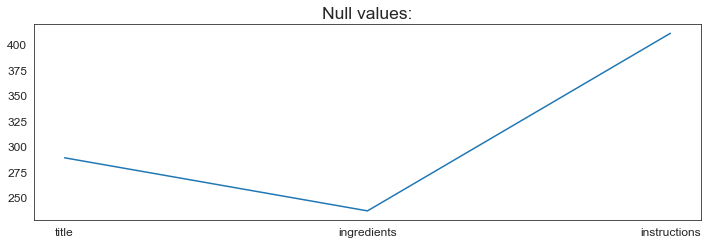

In [5]:
plt.figure(figsize=(10, 3.5))

plt.plot(df_clean.isna().sum())
_ = plt.title('Null values:', size=17.5)
_ = plt.xticks(size=12)
_ = plt.yticks(size=12)

plt.tight_layout()
plt.savefig('graphs/null_values.png')
plt.show()

Dropping missing values since we won't loose too much data.

In [6]:
df_clean.dropna(inplace=True)

In [7]:
# Filling some recipes with the name of the title since they are not considered as null:
df_clean['ingredients'] = np.where(df_clean['ingredients'].isnull(), df_clean['title'], df_clean['ingredients'])

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59628 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 3 columns):
title           59628 non-null object
ingredients     59628 non-null object
instructions    59628 non-null object
dtypes: object(3)
memory usage: 1.8+ MB


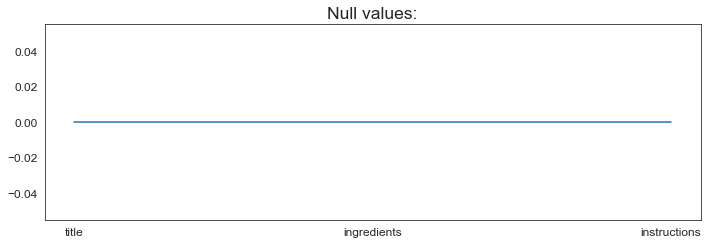

In [9]:
plt.figure(figsize=(10, 3.5))

plt.plot(df_clean.isna().sum())
_ = plt.title('Null values:', size=17.5)
_ = plt.xticks(size=12)
_ = plt.yticks(size=12)

plt.tight_layout()
plt.savefig('graphs/null_values.png')
plt.show()

#### 3.3 Lower Case:

In [10]:
df_clean['title'] = df_clean['title'].apply(lambda x: x.lower())
df_clean['ingredients'] = [[words.lower() for words in text] for text in df_clean['ingredients']]
df_clean['instructions'] = df_clean['instructions'].apply(lambda x: x.lower())
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblet's deviled crab,"[1/2 cup celery, finely chopped, 1 small green pepper finely chopped, 1/2 cup finely sliced green onions, 1/4 cup ch...","toss ingredients lightly and spoon into a buttered baking dish. top with additional crushed cracker crumbs, and brus..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,"[2 pounds skirt steak, cut into 1/2-inch dice, kosher salt and fresh cracked black pepper, 4 to 6 slices thick-cut a...",watch how to make this recipe.\nsprinkle the steak with salt and pepper. set aside.\nin a large dutch oven (preferab...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,"[1 1/2 cups dried black beans, picked over and rinsed, 8 cups water, plus 1/4 cup, 2 cloves garlic, 3 tablespoons ve...","in a large saucepan, let the beans soak in enough cold water to cover for 1 hour and drain. return the beans to the ..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,"[1 1/4 pounds ground chuck, one 15-ounce can tomato sauce, 1/2 teaspoon salt, freshly ground black pepper, 8 ounces ...",watch how to make this recipe.\npreheat the oven to 350 degrees f.\nbrown the ground chuck in a large skillet. drain...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-cup quinoa, 2/3-cup sweet red peppers, raw, 4 oz. white tuna, canned i...",special equipment: sushi mat\ncook the brown rice and quinoa in 3 cups of water (35-40 min.). bring to a boil for 2 ...


#### 3.4 Removing Punctuation

In [15]:
df_clean["title"] = df_clean['title'].str.replace('[^\w\s]','')
df_clean["ingredients"] = [''.join(c for c in s if c not in string.punctuation) for s in df_clean["ingredients"]]
df_clean["ingredients"] = [''.join(c for c in s if c not in string.punctuation) for s in df_clean["ingredients"]]
df_clean["instructions"] = df_clean['instructions'].str.replace('[^\w\s]','')
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,12 cup celery finely chopped1 small green pepper finely chopped12 cup finely sliced green onions14 cup chopped parsl...,toss ingredients lightly and spoon into a buttered baking dish top with additional crushed cracker crumbs and brush ...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,2 pounds skirt steak cut into 12inch dicekosher salt and fresh cracked black pepper4 to 6 slices thickcut applewood ...,watch how to make this recipe\nsprinkle the steak with salt and pepper set aside\nin a large dutch oven preferably e...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,1 12 cups dried black beans picked over and rinsed8 cups water plus 14 cup2 cloves garlic3 tablespoons vegetable oil...,in a large saucepan let the beans soak in enough cold water to cover for 1 hour and drain return the beans to the pa...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,1 14 pounds ground chuckone 15ounce can tomato sauce12 teaspoon saltfreshly ground black pepper8 ounces egg noodles1...,watch how to make this recipe\npreheat the oven to 350 degrees f\nbrown the ground chuck in a large skillet drain th...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,1 cup rice brown mediumgrain cooked12cup quinoa23cup sweet red peppers raw4 oz white tuna canned in water drained so...,special equipment sushi mat\ncook the brown rice and quinoa in 3 cups of water 3540 min bring to a boil for 2 minute...


#### 3.5 Removing Numbers

In [16]:
df_clean["title"] = df_clean['title'].str.replace('\d+','')
df_clean["ingredients"] = [''.join(c for c in s if c not in string.digits) for s in df_clean['ingredients']]
df_clean["instructions"] = df_clean['instructions'].str.replace('\d+','')
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,cup celery finely chopped small green pepper finely chopped cup finely sliced green onions cup chopped parsley poun...,toss ingredients lightly and spoon into a buttered baking dish top with additional crushed cracker crumbs and brush ...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,pounds skirt steak cut into inch dicekosher salt and fresh cracked black pepper to slices thickcut applewood smoke...,watch how to make this recipe\nsprinkle the steak with salt and pepper set aside\nin a large dutch oven preferably e...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked over and rinsed cups water plus cup cloves garlic tablespoons vegetable oil large g...,in a large saucepan let the beans soak in enough cold water to cover for hour and drain return the beans to the pan...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,pounds ground chuckone ounce can tomato sauce teaspoon saltfreshly ground black pepper ounces egg noodles cup sour...,watch how to make this recipe\npreheat the oven to degrees f\nbrown the ground chuck in a large skillet drain the f...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,cup rice brown mediumgrain cookedcup quinoacup sweet red peppers raw oz white tuna canned in water drained solids t...,special equipment sushi mat\ncook the brown rice and quinoa in cups of water min bring to a boil for minutes and ...


#### 3.6 Removing Stop Words

In [17]:
df_clean['ingredients'].str.contains('and')
df_clean['instructions'].str.contains('and')

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi    True
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO    True
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK    True
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK    True
kRBQSWtqYWqtkb34FGeenBSbC32gIdO    True
                                   ... 
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW    True
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m    True
f/coffo2TMs2J2gq5nTOUIqH2TRAkui    True
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS    True
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm    True
Name: instructions, Length: 59628, dtype: bool

In [18]:
stop_words = stopwords.words('english')
print(stop_words)

df_clean["ingredients"] = [' '.join(i for i in x.split() if i not in stop_words) for x in df_clean['ingredients']]
df_clean["instructions"] = df_clean['instructions'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_clean.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,cup celery finely chopped small green pepper finely chopped cup finely sliced green onions cup chopped parsley pound...,toss ingredients lightly spoon buttered baking dish top additional crushed cracker crumbs brush melted butter bake p...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,pounds skirt steak cut inch dicekosher salt fresh cracked black pepper slices thickcut applewood smoked bacon inch d...,watch make recipe sprinkle steak salt pepper set aside large dutch oven preferably enameled cast iron mediumhigh hea...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups water plus cup cloves garlic tablespoons vegetable oil large green bell pe...,large saucepan let beans soak enough cold water cover hour drain return beans pan cups water garlic bring water boil...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,pounds ground chuckone ounce tomato sauce teaspoon saltfreshly ground black pepper ounces egg noodles cup sour cream...,watch make recipe preheat oven degrees f brown ground chuck large skillet drain fat add tomato sauce teaspoon salt p...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,cup rice brown mediumgrain cookedcup quinoacup sweet red peppers raw oz white tuna canned water drained solids tbs s...,special equipment sushi mat cook brown rice quinoa cups water min bring boil minutes reduce heat stir cooked remove ...


In [19]:
df_clean['ingredients'].str.contains('and')
df_clean['instructions'].str.contains('and')

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi    False
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO    False
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK    False
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK    False
kRBQSWtqYWqtkb34FGeenBSbC32gIdO    False
                                   ...  
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW    False
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m    False
f/coffo2TMs2J2gq5nTOUIqH2TRAkui     True
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS     True
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm    False
Name: instructions, Length: 59628, dtype: bool

#### 3.7 Remove meassurements

In [20]:
# Defining measurement words and prep words:
measure_tokens = ['cup', 'can', 'teaspoon', 'tsp', 'tablespoon', 'tbsp', 'pound', 'lb', 'jar', 'bottle', 'stick', 'about', 'pounds','cups'
                  'pinch', 'appx', 'half', 'optional', 'milliter', 'micro', 'ounce', 'small', 'large', 'medium', 'envelope', 
                  'ear', 'piece', 'drops', 'oz', 'bunch', 'slice', 'spoonful', 'advertisement']

prep_tokens = ['diced', 'stewed', 'chopped', 'crumbled', 'peeled', 'minced', 'fresh', 'divided', 'cooked', 'washed', 'softened',
               'sliced', 'deveined', 'shaken', 'finely', 'toasted', 'frozen', 'mixed', 'cut', 'squeezed', 'cracked', 'halved',
               'roasted', 'grilled','dried', 'freshly', 'ground', 'coarse', 'beaten', 'blend', 'blended', 'seeded', 
               'grated', 'chilled', 'garnish', 'discarded', 'powdered', 'cooled', 'sifted', 'drained', 'granulated', 'crushed']

In [21]:
df_clean["ingredients"] = [' '.join(i for i in x.split() if i not in measure_tokens and prep_tokens) for x in df_clean['ingredients']]
df_clean["instructions"] = df_clean['instructions'].apply(lambda x: ' '.join([word for word in x.split() if word not in measure_tokens and prep_tokens]))
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chopped finely sliced green onions chopped parsley crabmeat cups coarsely ...,toss ingredients lightly spoon buttered baking dish top additional crushed cracker crumbs brush melted butter bake p...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cracked black pepper slices thickcut applewood smoked bacon inch diced cu...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enameled cast iron mediumhigh heat rend...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups water plus cloves garlic tablespoons vegetable oil green bell pepper finel...,saucepan let beans soak enough cold water cover hour drain return beans pan cups water garlic bring water boil lower...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly ground black pepper ounces egg noodles sour cream cups curd cottage cheesep...,watch make recipe preheat oven degrees f brown ground chuck skillet drain fat add tomato sauce salt plenty freshly g...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup sweet red peppers raw white tuna canned water drained solids tbs seaweed ...,special equipment sushi mat cook brown rice quinoa cups water min bring boil minutes reduce heat stir cooked remove ...


In [22]:
df_clean['ingredients'].str.contains('cup')
df_clean['instructions'].str.contains('cup')
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chopped finely sliced green onions chopped parsley crabmeat cups coarsely ...,toss ingredients lightly spoon buttered baking dish top additional crushed cracker crumbs brush melted butter bake p...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cracked black pepper slices thickcut applewood smoked bacon inch diced cu...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enameled cast iron mediumhigh heat rend...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups water plus cloves garlic tablespoons vegetable oil green bell pepper finel...,saucepan let beans soak enough cold water cover hour drain return beans pan cups water garlic bring water boil lower...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly ground black pepper ounces egg noodles sour cream cups curd cottage cheesep...,watch make recipe preheat oven degrees f brown ground chuck skillet drain fat add tomato sauce salt plenty freshly g...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup sweet red peppers raw white tuna canned water drained solids tbs seaweed ...,special equipment sushi mat cook brown rice quinoa cups water min bring boil minutes reduce heat stir cooked remove ...


#### 3.8 Creating New Columns For Vectors:

In [23]:
df_clean['ingredients_vector'] = df_clean['ingredients']
df_clean['instructions_vector'] = df_clean['instructions']
df_clean.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chopped finely sliced green onions chopped parsley crabmeat cups coarsely ...,toss ingredients lightly spoon buttered baking dish top additional crushed cracker crumbs brush melted butter bake p...,celery finely chopped green pepper finely chopped finely sliced green onions chopped parsley crabmeat cups coarsely ...,toss ingredients lightly spoon buttered baking dish top additional crushed cracker crumbs brush melted butter bake p...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cracked black pepper slices thickcut applewood smoked bacon inch diced cu...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enameled cast iron mediumhigh heat rend...,skirt steak cut inch dicekosher salt fresh cracked black pepper slices thickcut applewood smoked bacon inch diced cu...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enameled cast iron mediumhigh heat rend...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups water plus cloves garlic tablespoons vegetable oil green bell pepper finel...,saucepan let beans soak enough cold water cover hour drain return beans pan cups water garlic bring water boil lower...,cups dried black beans picked rinsed cups water plus cloves garlic tablespoons vegetable oil green bell pepper finel...,saucepan let beans soak enough cold water cover hour drain return beans pan cups water garlic bring water boil lower...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly ground black pepper ounces egg noodles sour cream cups curd cottage cheesep...,watch make recipe preheat oven degrees f brown ground chuck skillet drain fat add tomato sauce salt plenty freshly g...,ground chuckone tomato sauce saltfreshly ground black pepper ounces egg noodles sour cream cups curd cottage cheesep...,watch make recipe preheat oven degrees f brown ground chuck skillet drain fat add tomato sauce salt plenty freshly g...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup sweet red peppers raw white tuna canned water drained solids tbs seaweed ...,special equipment sushi mat cook brown rice quinoa cups water min bring boil minutes reduce heat stir cooked remove ...,rice brown mediumgrain cookedcup quinoacup sweet red peppers raw white tuna canned water drained solids tbs seaweed ...,special equipment sushi mat cook brown rice quinoa cups water min bring boil minutes reduce heat stir cooked remove ...


#### 3.9 Word Tokenizer:

In [24]:
df_clean['ingredients_vector'] = df_clean['ingredients_vector'].apply(word_tokenize)
df_clean['instructions_vector'] = df_clean['instructions_vector'].apply(word_tokenize)
df_clean.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chopped finely sliced green onions chopped parsley crabmeat cups coarsely ...,toss ingredients lightly spoon buttered baking dish top additional crushed cracker crumbs brush melted butter bake p...,"[celery, finely, chopped, green, pepper, finely, chopped, finely, sliced, green, onions, chopped, parsley, crabmeat,...","[toss, ingredients, lightly, spoon, buttered, baking, dish, top, additional, crushed, cracker, crumbs, brush, melted..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cracked black pepper slices thickcut applewood smoked bacon inch diced cu...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enameled cast iron mediumhigh heat rend...,"[skirt, steak, cut, inch, dicekosher, salt, fresh, cracked, black, pepper, slices, thickcut, applewood, smoked, baco...","[watch, make, recipe, sprinkle, steak, salt, pepper, set, aside, dutch, oven, preferably, enameled, cast, iron, medi..."
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups water plus cloves garlic tablespoons vegetable oil green bell pepper finel...,saucepan let beans soak enough cold water cover hour drain return beans pan cups water garlic bring water boil lower...,"[cups, dried, black, beans, picked, rinsed, cups, water, plus, cloves, garlic, tablespoons, vegetable, oil, green, b...","[saucepan, let, beans, soak, enough, cold, water, cover, hour, drain, return, beans, pan, cups, water, garlic, bring..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly ground black pepper ounces egg noodles sour cream cups curd cottage cheesep...,watch make recipe preheat oven degrees f brown ground chuck skillet drain fat add tomato sauce salt plenty freshly g...,"[ground, chuckone, tomato, sauce, saltfreshly, ground, black, pepper, ounces, egg, noodles, sour, cream, cups, curd,...","[watch, make, recipe, preheat, oven, degrees, f, brown, ground, chuck, skillet, drain, fat, add, tomato, sauce, salt..."
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup sweet red peppers raw white tuna canned water drained solids tbs seaweed ...,special equipment sushi mat cook brown rice quinoa cups water min bring boil minutes reduce heat stir cooked remove ...,"[rice, brown, mediumgrain, cookedcup, quinoacup, sweet, red, peppers, raw, white, tuna, canned, water, drained, soli...","[special, equipment, sushi, mat, cook, brown, rice, quinoa, cups, water, min, bring, boil, minutes, reduce, heat, st..."


#### 4.0 Saving cleaned DF for Analysis and Training:m

In [25]:
df_clean.to_csv(path_or_buf='data/strings/df_clean.csv')

#### 4.1 Dropping and Cleaning Columns:

In [ ]:
df_clean_loaded = pd.read_csv('data/strings/df_clean.csv', index_col=0)
df_clean_loaded.info()

In [ ]:
# Filling some recipes with the name of the title since they are not considered as null:
df_clean_loaded['ingredients'] = np.where(df_clean_loaded['ingredients'].isnull(), df_clean_loaded['title'], df_clean_loaded['ingredients'])

In [ ]:
df_clean_loaded[df_clean_loaded.isna().any(axis=1)]

In [ ]:
df_clean_loaded = df_clean_loaded.dropna()
df_clean_loaded.info()

In [ ]:
df_clean_loaded.to_csv(path_or_buf='data/strings/df_clean.csv')

## Vectorizing Columns:

In [ ]:
df_clean_test = pd.DataFrame()
ingredients_model = gs.Word2Vec(df_clean['ingredients_vector'], min_count=1, size= 50, workers=3, window=3, sg=1)
instructions_model = gs.Word2Vec(df_clean['instructions_vector'], min_count=1, size= 50, workers=3, window=3, sg=1)

In [ ]:
print(model)
data = model.most_similar('chicken')
print(data)

In [ ]:
df_clean_test['instructions_vectored'] = df_clean_test['ingredients'].word_index